In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#
# Load Dataset
#

df = pd.read_csv("/content/Telco-Customer-Churn.csv")

df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [64]:
##
# Convert String values to numerical values
#

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

for column in df.columns:
    dataType = df[column].dtype

    if(dataType == 'object'):

        # Fit and transform the data
        df[column] = encoder.fit_transform(df[column])

df


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [65]:
# prompt: remove rownumber, custmerid, surname

# df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
# df


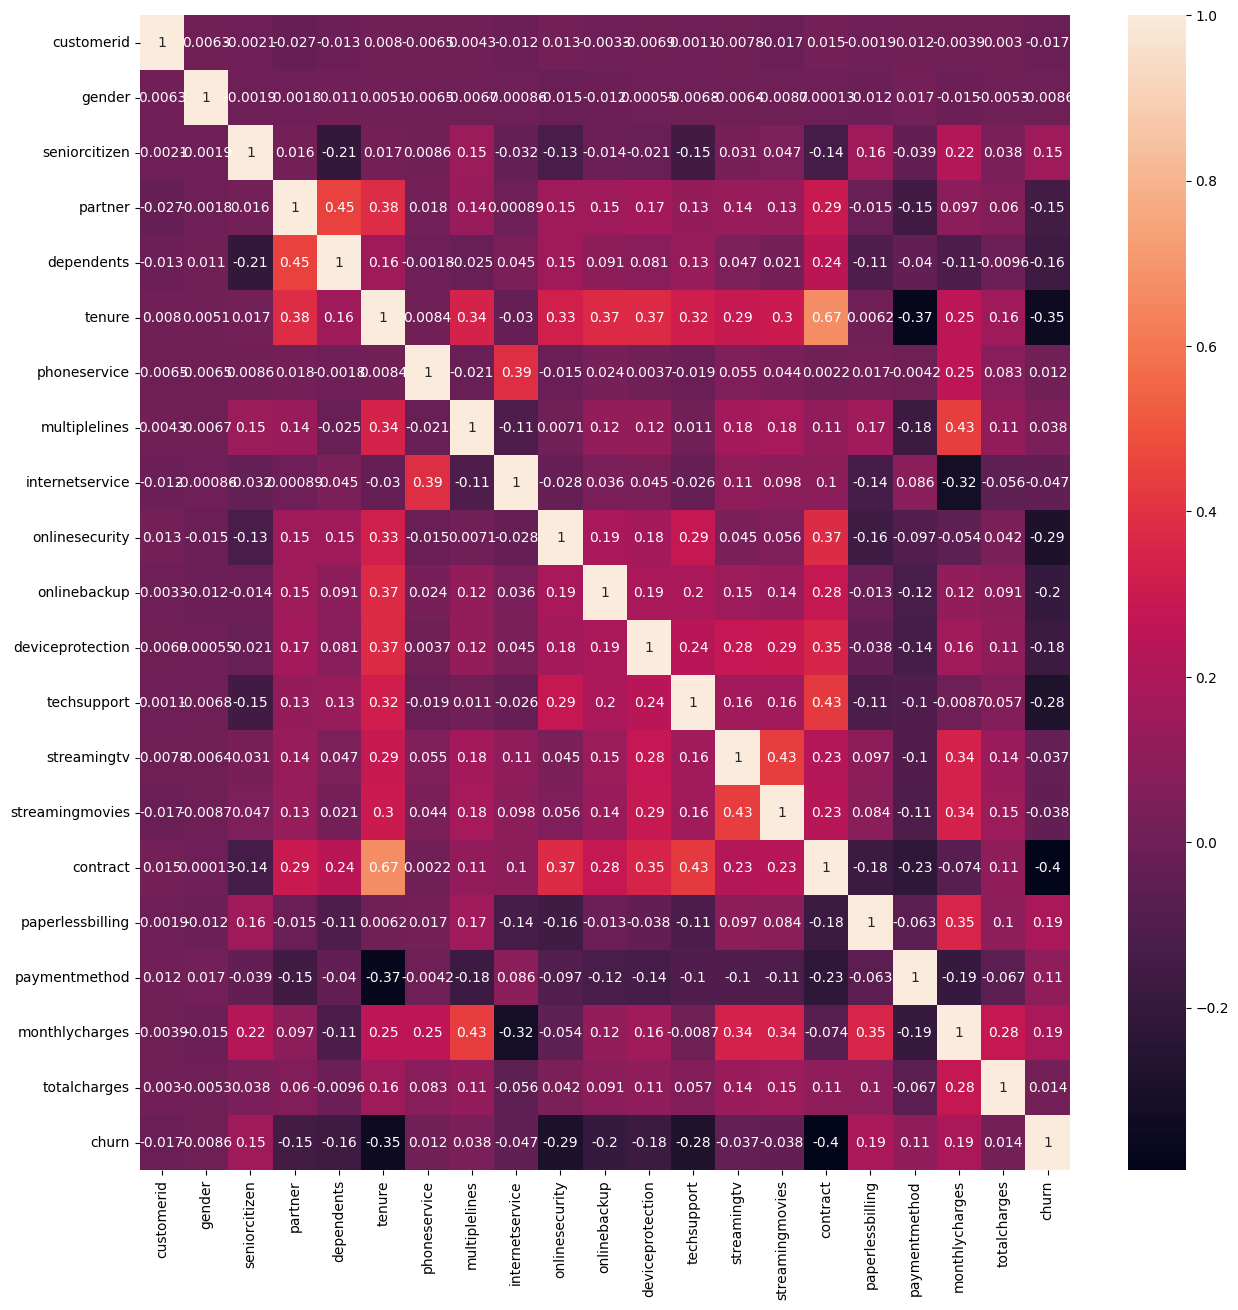

In [66]:
#
# Find Feature Selection
#
new_df = df

plt.figure(figsize=(15, 15))

corrMatrix = new_df.corr()

# Plotting correlation heatmap
dataplot = sns.heatmap(new_df.corr(), annot=True)


# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Get the absolute correlation values with respect to 'churn'
churn_correlation = correlation_matrix['churn'].drop('churn')  # Drop 'churn' itself

# Sort the features by correlation and select the top 8
top_positive_features = churn_correlation.nlargest(4).index.tolist()
top_negative_features = churn_correlation.nsmallest(4).index.tolist()

# Combine top positive and top negative features
top_features = top_positive_features, top_negative_features




In [68]:
# Extract the new features
new_features = []
for i in range(len(top_features)):
  feature = top_features[i]
  for new in feature:
    new_features.append(new)

new_features

['monthlycharges',
 'paperlessbilling',
 'seniorcitizen',
 'paymentmethod',
 'contract',
 'tenure',
 'onlinesecurity',
 'techsupport']

In [69]:
# Combine the top features
new_df = df[new_features + ['churn']]
new_df

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,onlinesecurity,techsupport,churn
0,29.85,1,0,2,0,1,0,0,0
1,56.95,0,0,3,1,34,2,0,0
2,53.85,1,0,3,0,2,2,0,1
3,42.30,0,0,0,1,45,2,2,0
4,70.70,1,0,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,84.80,1,0,3,1,24,2,2,0
7039,103.20,1,0,1,1,72,0,0,0
7040,29.60,1,0,2,0,11,2,0,0
7041,74.40,1,1,3,0,4,0,0,1


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Define target
target = 'churn'

# Split the data into features and target variable
X = df[new_features]
y = df['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Decision Tree Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.72      0.72      1409

Random Forest Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69  